### NLP Test

In some questions there are 'Fill in the blanks', in some questions you have to write the entire code. You can refer to the course materials and assignments for the code syntax.

In this test we will analyse Amazon products(Alexa, Fire stick) reviews using NLP.

<img src="E:/NLP/NLPtest/Alexa.JPG" width="400">

##### Full Marks = 35
##### Pass Marks = 21 (60%)

#### Import Packages

In [20]:
import pandas as pd
import numpy as np
import nltk

nltk.download('vader_lexicon')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import string

import re
import string

from nltk.tokenize import sent_tokenize, word_tokenize

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import wordnet as wn

[nltk_data] Downloading package vader_lexicon to C:\Users\Gautham V
[nltk_data]     Bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##### Import the dataset

In [21]:
data = pd.read_csv('E:/NLP/NLPtest/amazon_alexa.tsv',sep="\t")

In [22]:
# Check the data
data.head()

,﻿rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [23]:
print("count of reviews : " + str(len(data)))
print("count of products : " + str(data['variation'].nunique()))

count of reviews : 3150
count of products : 16


##### Text Cleaning

In [24]:
def punctuation_trimming(tok):
    y = [x.lower() for x in tok if x not in string.punctuation]
    return y

def special_char_removal(st1):
    z = re.sub('[^A-Za-z0-9]+', ' ', st1)
    return z


def tok_NLTK_stem(a):
    lmtzr = WordNetLemmatizer()
    empty_lst = []
    for i in range(0, len(a)):
        text1 = lmtzr.lemmatize(a[i])
        empty_lst.append(text1)
    return empty_lst


def stopw_rem(tok):
    clean_tokens = tok[:]

    for token in tok:
        if token in stop_words:
            clean_tokens.remove(token)
    return clean_tokens

#### Initial check and cleaning

   1. Create columns with sentence token and word token (word token should not have punctuations) (2)
   - Remove stop words from word token. Create frequency distribution chart before and after stop word removal and write your observations (5)

In [25]:
# Check Avg, Min, Max no of sentence in reviews
data.loc[:,'sentok'] = data.verified_reviews.apply(sent_tokenize)
sentlen = data.sentok.apply(len)
print(np.mean(sentlen))
print(np.min(sentlen))
print(np.max(sentlen))

2.343809523809524
1
22


In [27]:
# Check word count distribution before and after stop word removal

data.loc[:,'wordtok'] = data.verified_reviews.apply(word_tokenize)

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


data.loc[:,'wordtok2'] = data.wordtok.apply(stopw_rem)


#Avg, Min, Max no of sentence in reviews after stop word removal
wrdcnt = data.wordtok2.apply(len)
print(np.mean(wrdcnt))
print(np.min(wrdcnt))
print(np.max(wrdcnt))

18.18126984126984
0
424


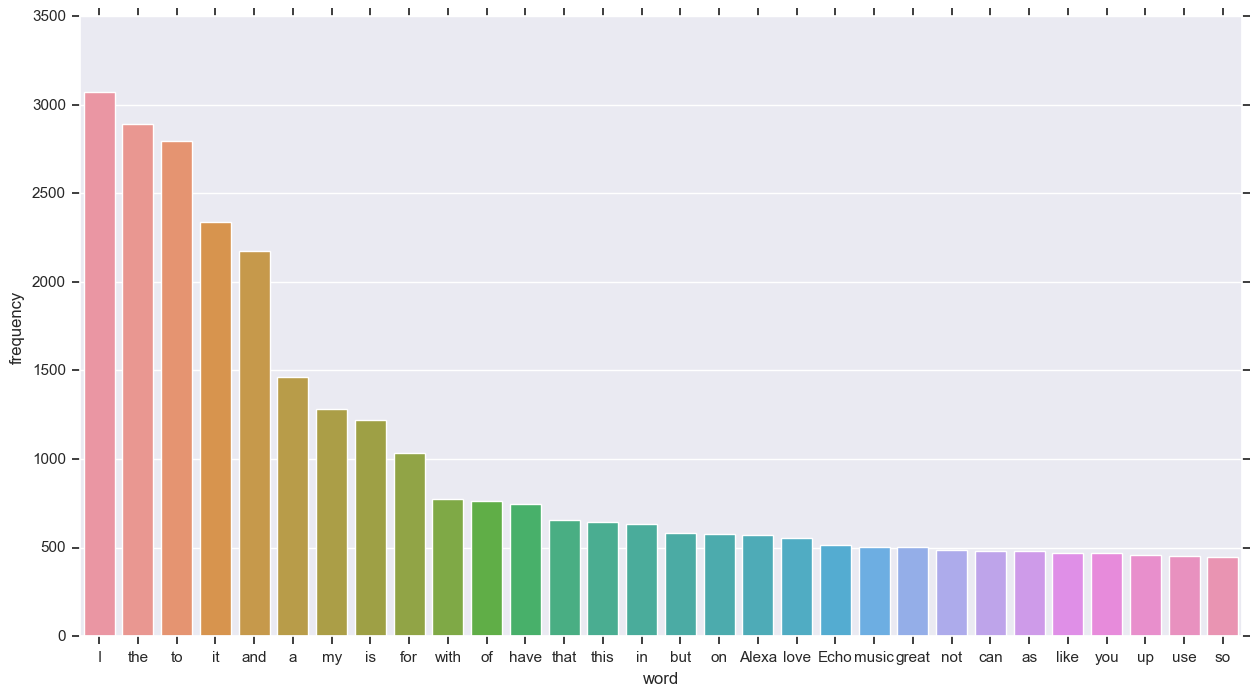

In [28]:
### Word Frequency

bag_of_words = sum(list(data.wordtok),[])

### Remove special characters
cleaned_tok1 = [re.sub('[^A-Za-z0-9]+', ' ', tok) for tok in bag_of_words]
cleaned_tok = [tok for tok in cleaned_tok1 if tok not in [' ']] #Removing blanks as well 


# Word Frequency
freq = pd.DataFrame.from_dict(nltk.FreqDist(cleaned_tok), orient='index')
freq.columns = ['frequency']
freq['word'] = freq.index
freq = freq.sort_values(by = ['frequency'], ascending = False)
freq.head()

### Bar plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,8)})

ax = sns.barplot(x="word", y="frequency", data=freq.iloc[0:30,:])

plt.show()

In [29]:
data.head()

,﻿rating,date,variation,verified_reviews,feedback,sentok,wordtok,wordtok2
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,[Love my Echo!],"[Love, my, Echo, !]","[Love, Echo, !]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,[Loved it!],"[Loved, it, !]","[Loved, !]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"[Sometimes while playing a game, you can answe...","[Sometimes, while, playing, a, game, ,, you, c...","[Sometimes, playing, game, ,, answer, question..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,"[I have had a lot of fun with this thing., My ...","[I, have, had, a, lot, of, fun, with, this, th...","[I, lot, fun, thing, ., My, 4, yr, old, learns..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,[Music],[Music],[Music]


#### Identify 2 Amazon products which has the most similar kind of Reviews with rating as 1

   1. Create another word token column after lemmatization (2)
   - Create another dataframe which has only rating = 1 (1)
   - Create a column which has the POS tags of the tokens (2)
   - Create a columns which has the synsets of the tokens (2)
   - Create a dataframe after a cross join , so that we have different combination of product reviews (1)
   - Run the Similarity function (Use wu similarity / path similarity) (3)
   - Identify and print the names of two product with most similar score (2)

In [35]:
### Lemmatization

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemm2(tok):
    for word, tag in pos_tag(tok):
        if tag.startswith("NN"):
            yield lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            yield lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            yield lemmatizer.lemmatize(word, pos='a')
        else:
            yield word

def lemm(tok):
    newtok = [lemmatizer.lemmatize(w) for w in tok]
    return newtok

def applylemm2(tok):
    return ' '.join(lemm2(tok))

data['wordtokClean'] = data.wordtok2.apply(lemm)
lem = data.wordtokClean.apply(applylemm2)

data.loc[:,'wordtok3'] = [word_tokenize(x) for x in lem]


data.head()



,﻿rating,date,variation,verified_reviews,feedback,sentok,wordtok,wordtok2,wordtokClean,Lemmatized,wordtok3
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,[Love my Echo!],"[Love, my, Echo, !]","[Love, Echo, !]","[Love, Echo, !]",Love Echo !,"[Love, Echo, !]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,[Loved it!],"[Loved, it, !]","[Loved, !]","[Loved, !]",Loved !,"[Loved, !]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"[Sometimes while playing a game, you can answe...","[Sometimes, while, playing, a, game, ,, you, c...","[Sometimes, playing, game, ,, answer, question...","[Sometimes, playing, game, ,, answer, question...","Sometimes play game , answer question correctl...","[Sometimes, play, game, ,, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,"[I have had a lot of fun with this thing., My ...","[I, have, had, a, lot, of, fun, with, this, th...","[I, lot, fun, thing, ., My, 4, yr, old, learns...","[I, lot, fun, thing, ., My, 4, yr, old, learns...",I lot fun thing . My 4 yr old learns dinosaur ...,"[I, lot, fun, thing, ., My, 4, yr, old, learns..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,[Music],[Music],[Music],[Music],Music,[Music]


In [36]:
### POS tagger

from nltk.tag import PerceptronTagger
from nltk.data import find
#pos_iden(x)
PICKLE = "averaged_perceptron_tagger.pickle"
AP_MODEL_LOC = 'file:'+str(find('taggers/averaged_perceptron_tagger/'+PICKLE))
tagger = PerceptronTagger(load=False)
tagger.load(AP_MODEL_LOC)
pos_tag = tagger.tag

In [37]:
### FIlter data with Negative reviews (rating 1)

neg_data = data[data['\ufeffrating'] == 1]
len(neg_data)

161

In [38]:
### Create a column which has token with pos tags (list of tuples)
def posTag(tok):
    return pos_tag(word_tokenize(tok))
    
neg_data.loc[:,'word_pos'] = neg_data.verified_reviews.apply(posTag)

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
neg_data.head()

,﻿rating,date,variation,verified_reviews,feedback,sentok,wordtok,wordtok2,wordtokClean,Lemmatized,wordtok3,word_pos
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,[Not much features.],"[Not, much, features, .]","[Not, much, features, .]","[Not, much, feature, .]",Not much feature .,"[Not, much, feature, .]","[(Not, RB), (much, JJ), (features, NNS), (., .)]"
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,"[Stopped working after 2 weeks ,didn't follow ...","[Stopped, working, after, 2, weeks, ,, did, n'...","[Stopped, working, 2, weeks, ,, n't, follow, c...","[Stopped, working, 2, week, ,, n't, follow, co...","Stopped work 2 week , n't follow command ! ? R...","[Stopped, work, 2, week, ,, n't, follow, comma...","[(Stopped, NNP), (working, VBG), (after, IN), ..."
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0,[Alexa hardly came on..],"[Alexa, hardly, came, on..]","[Alexa, hardly, came, on..]","[Alexa, hardly, came, on..]",Alexa hardly come on..,"[Alexa, hardly, come, on..]","[(Alexa, NNP), (hardly, RB), (came, VBD), (on...."
350,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0,[Item no longer works after just 5 months of u...,"[Item, no, longer, works, after, just, 5, mont...","[Item, longer, works, 5, months, use, ., Will,...","[Item, longer, work, 5, month, use, ., Will, c...",Item long work 5 month use . Will connect wifi...,"[Item, long, work, 5, month, use, ., Will, con...","[(Item, NNP), (no, RB), (longer, RB), (works, ..."
361,1,29-Jul-18,Black,This thing barely works. You have to select 3r...,0,"[This thing barely works., You have to select ...","[This, thing, barely, works, ., You, have, to,...","[This, thing, barely, works, ., You, select, 3...","[This, thing, barely, work, ., You, select, 3r...",This thing barely work . You select 3rd party ...,"[This, thing, barely, work, ., You, select, 3r...","[(This, DT), (thing, NN), (barely, RB), (works..."


In [40]:
### Functions for similarity

def penn_to_wn(tag):
    """ Convert between a Penn Treebank tag to a simplified Wordnet tag """
    if tag.startswith('N'):
        return 'n'
 
    if tag.startswith('V'):
        return 'v'
 
    if tag.startswith('J'):
        return 'a'
 
    if tag.startswith('R'):
        return 'r'
 
    return None

def tagged_to_synset(word, tag):
    wn_tag = penn_to_wn(tag)
    if wn_tag is None:
        return None
    try:
        return wn.synsets(word, wn_tag)[0]
    except:
        return None

def get_synset(pos):
    syn = [tagged_to_synset(*tagged_word) for tagged_word in pos]
    syn = [ss for ss in syn if ss]
    return(syn)

In [41]:
### Create Synsets
def createSynset(tok):
    return [tagged_to_synset(*tagged_word) for tagged_word in tok]

neg_data.loc[:,'synsets'] = neg_data.word_pos.apply(createSynset)

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [42]:
neg_data.head()

,﻿rating,date,variation,verified_reviews,feedback,sentok,wordtok,wordtok2,wordtokClean,Lemmatized,wordtok3,word_pos,synsets
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,[Not much features.],"[Not, much, features, .]","[Not, much, features, .]","[Not, much, feature, .]",Not much feature .,"[Not, much, feature, .]","[(Not, RB), (much, JJ), (features, NNS), (., .)]","[Synset('not.r.01'), Synset('much.a.01'), Syns..."
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,"[Stopped working after 2 weeks ,didn't follow ...","[Stopped, working, after, 2, weeks, ,, did, n'...","[Stopped, working, 2, weeks, ,, n't, follow, c...","[Stopped, working, 2, week, ,, n't, follow, co...","Stopped work 2 week , n't follow command ! ? R...","[Stopped, work, 2, week, ,, n't, follow, comma...","[(Stopped, NNP), (working, VBG), (after, IN), ...","[None, Synset('work.v.01'), None, None, Synset..."
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0,[Alexa hardly came on..],"[Alexa, hardly, came, on..]","[Alexa, hardly, came, on..]","[Alexa, hardly, came, on..]",Alexa hardly come on..,"[Alexa, hardly, come, on..]","[(Alexa, NNP), (hardly, RB), (came, VBD), (on....","[None, Synset('barely.r.01'), Synset('come.v.0..."
350,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0,[Item no longer works after just 5 months of u...,"[Item, no, longer, works, after, just, 5, mont...","[Item, longer, works, 5, months, use, ., Will,...","[Item, longer, work, 5, month, use, ., Will, c...",Item long work 5 month use . Will connect wifi...,"[Item, long, work, 5, month, use, ., Will, con...","[(Item, NNP), (no, RB), (longer, RB), (works, ...","[Synset('item.n.01'), Synset('no.r.01'), Synse..."
361,1,29-Jul-18,Black,This thing barely works. You have to select 3r...,0,"[This thing barely works., You have to select ...","[This, thing, barely, works, ., You, have, to,...","[This, thing, barely, works, ., You, select, 3...","[This, thing, barely, work, ., You, select, 3r...",This thing barely work . You select 3rd party ...,"[This, thing, barely, work, ., You, select, 3r...","[(This, DT), (thing, NN), (barely, RB), (works...","[None, Synset('thing.n.01'), Synset('barely.r...."


In [43]:
### Corss join
neg_data.loc[:,'key'] = 1
neg_data2 = pd.merge(neg_data, neg_data,on='key')[['variation_x', 'verified_reviews_x', 'synsets_x','variation_y', 'verified_reviews_y', 'synsets_y']]

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [44]:
neg_data2.head()

,variation_x,verified_reviews_x,synsets_x,variation_y,verified_reviews_y,synsets_y
0,Charcoal Fabric,Not much features.,"[Synset('not.r.01'), Synset('much.a.01'), Syns...",Charcoal Fabric,Not much features.,"[Synset('not.r.01'), Synset('much.a.01'), Syns..."
1,Charcoal Fabric,Not much features.,"[Synset('not.r.01'), Synset('much.a.01'), Syns...",Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...","[None, Synset('work.v.01'), None, None, Synset..."
2,Charcoal Fabric,Not much features.,"[Synset('not.r.01'), Synset('much.a.01'), Syns...",Charcoal Fabric,Alexa hardly came on..,"[None, Synset('barely.r.01'), Synset('come.v.0..."
3,Charcoal Fabric,Not much features.,"[Synset('not.r.01'), Synset('much.a.01'), Syns...",Black,Item no longer works after just 5 months of us...,"[Synset('item.n.01'), Synset('no.r.01'), Synse..."
4,Charcoal Fabric,Not much features.,"[Synset('not.r.01'), Synset('much.a.01'), Syns...",Black,This thing barely works. You have to select 3r...,"[None, Synset('thing.n.01'), Synset('barely.r...."


In [45]:
### Filter out similar products
neg_data2.loc[:,'check'] = np.where((neg_data2.variation_x == neg_data2.variation_y),0,1)
neg_data2 = neg_data2[neg_data2.check == 1].reset_index(drop=True)

In [46]:
### Function to calculate similarity score
def get_similarity_score(syn1,syn2):
    all_score = []
    # For each word in the first sentence
    for synset in syn1:
        # Get the similarity value of the most similar word in the other sentence
        score = [synset.path_similarity(ss) for ss in syn2]
        score = list(filter(None.__ne__, score))
        best_score = max(score) if len(score) > 0 else 0
        all_score.append(best_score)
        return(np.mean(all_score))

In [47]:
def removeNone(synsets):
    return [ss for ss in synsets if ss]

neg_data2['synsets_x'] = neg_data2.synsets_x.apply(removeNone)

neg_data2['synsets_y'] = neg_data2.synsets_y.apply(removeNone)


In [48]:
neg_data2['score'] = 0

for i in range(0,len(neg_data2)):
    #print(i)
    syn1 = neg_data2.loc[i,'synsets_x']
    syn2 = neg_data2.loc[i,'synsets_y']
    neg_data2.loc[i,'score'] = get_similarity_score(syn1,syn2)

In [49]:
# Identify 2 product names which has max similarity score
prod_score = neg_data2.groupby(['variation_x','variation_y'],as_index=False)['score'].mean()
prod_score.loc[prod_score['score'].idxmax()]

variation_x          White  Plus
variation_y    Sandstone Fabric 
score                       0.75
Name: 127, dtype: object

#### Most relevant review of a term using TF-IDF

   1. Identify and print the most relevant review of term "amazing" (2)

In [52]:
### Top 5 relevant reviews for term "great" using TF-IDF

term = "amazing"

import heapq

### TF-IDF
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)

data.loc[:,'review2'] = data.wordtok3.apply(lambda x : ' '.join(x))
corpus = list(data.review2)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()


# find the index of the term
term_index = feature_names.index(term)
term_score = X[:,term_index]
term_score = [term_score.toarray()[x][0] for x in range(len(term_score.toarray())) ] # List of all scores of that term
max_index = term_score.index(max(term_score))# index of the maximum score
print(max_index)
print(data.verified_reviews[max_index])

537
Amazing


#### Sentiment Analysis

   1. Calculate the sentiment score using Vader for both "verified_reviews" and "review2" columns (2)
   - Write in comments what are the causes behind different scores for two columns (3)
   - Is there any anomalies in the vader scores ? if yes, what is the percentage of data with anomalies for both scores ? (4)
   - What can be done to reduce the anomalies ? (2)
   - Create a word cloud of data with negative sentiment scores (2)

##### You can use only compound score for the analysis. To extract compund score , you can use the key 'compound' as index to filter that score

In [59]:
### Sentiment Analysis
def sentimentCalc(sentok):
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(sentok)
    return (ss['compound'])


data.loc[:,'sent_score'] = data.verified_reviews.apply(sentimentCalc)
data.loc[:,'sent_score2'] = data.review2.apply(sentimentCalc)

In [60]:
data.head()

,﻿rating,date,variation,verified_reviews,feedback,sentok,wordtok,wordtok2,wordtokClean,Lemmatized,wordtok3,review2,sent_score,sent_score2
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,[Love my Echo!],"[Love, my, Echo, !]","[Love, Echo, !]","[Love, Echo, !]",Love Echo !,"[Love, Echo, !]",Love Echo !,0.6696,0.6696
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,[Loved it!],"[Loved, it, !]","[Loved, !]","[Loved, !]",Loved !,"[Loved, !]",Loved !,0.6360,0.6360
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"[Sometimes while playing a game, you can answe...","[Sometimes, while, playing, a, game, ,, you, c...","[Sometimes, playing, game, ,, answer, question...","[Sometimes, playing, game, ,, answer, question...","Sometimes play game , answer question correctl...","[Sometimes, play, game, ,, answer, question, c...","Sometimes play game , answer question correctl...",-0.1280,0.2023
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,"[I have had a lot of fun with this thing., My ...","[I, have, had, a, lot, of, fun, with, this, th...","[I, lot, fun, thing, ., My, 4, yr, old, learns...","[I, lot, fun, thing, ., My, 4, yr, old, learns...",I lot fun thing . My 4 yr old learns dinosaur ...,"[I, lot, fun, thing, ., My, 4, yr, old, learns...",I lot fun thing . My 4 yr old learns dinosaur ...,0.9169,0.9260
4,5,31-Jul-18,Charcoal Fabric,Music,1,[Music],[Music],[Music],[Music],Music,[Music],Music,0.0000,0.0000


In [61]:
### Answers of 2,3,4 as comments
#2. review2 has reviews which are cleaned and removed irrelevant words. This increases the overall scores
#3. VADER scores can have anomalies if there are double negatives which the score will interpret as negative. 
#4 TO avoid this you can group words and samples can be taken and assigned scores 


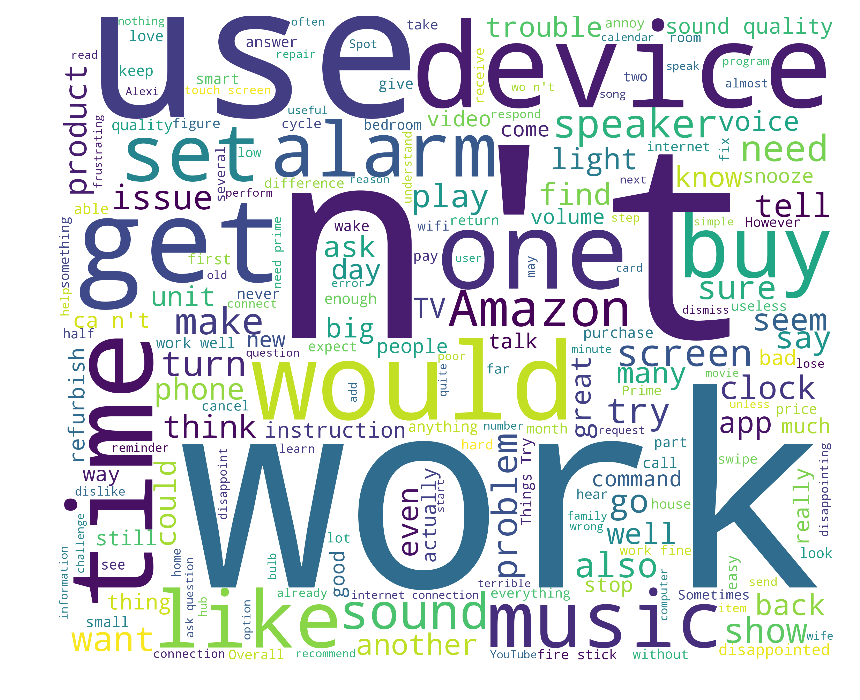

In [62]:
### wordcloud
import wordcloud
from wordcloud import WordCloud

cleaned_tokens = sum(list(data.wordtok3[data.sent_score < 0]),[])

stop_words.add('echo')
stop_words.add('dot')
stop_words.add('alexa')

wordcloud = WordCloud(stopwords=stop_words,width=3000,height=2500,background_color='white',).generate("+".join(cleaned_tokens))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()